In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append('/jbk001-data1/git/SuperPnP/')

import torch
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random

In [8]:
outs_dict = torch.load('inference_outs.pth')

outs_dict['superpoint_correspondences'].shape

(349, 4)

In [9]:
cat_images = np.concatenate([ outs_dict['inputs']['image1'],  outs_dict['inputs']['image2']], axis=0)
h, w = cat_images.shape[0] / 2, cat_images.shape[1] / 2

correspondences = outs_dict['superpoint_correspondences']
keypoints = outs_dict['keypoints']

correspondences.shape, keypoints[0].shape

((349, 4), (461, 3))

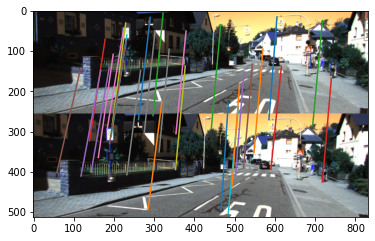

In [10]:
plt.imshow(cat_images, aspect='equal')

for i in range(28):
    plt.plot([correspondences[i][0], correspondences[i][2]], [correspondences[i][1], correspondences[i][3] + h])

plt.savefig('correspondence_out.png')

In [6]:
keypoints[0].shape

(448, 3)

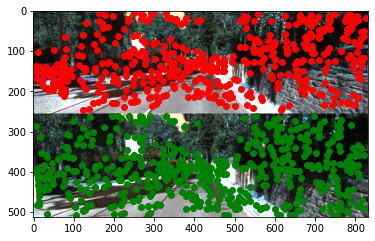

In [7]:
plt.imshow(cat_images, aspect='equal')

for keypoint in keypoints[0]:
    plt.plot(keypoint[0], keypoint[1], 'o', color='red')
    
for keypoint in keypoints[1]:
    plt.plot(keypoint[0], keypoint[1] + h, 'o', color='green')

plt.savefig('keypoint_out.png')